In [2]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


from collections import OrderedDict


In [3]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

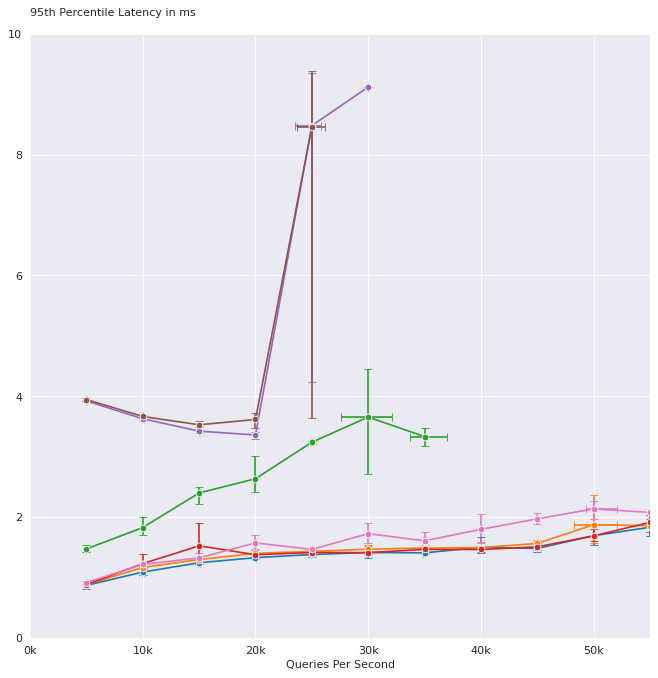

In [75]:
def plot(): 
    
    fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
    for subdir in os.scandir("../results"): 
        all_files = glob.glob(os.path.join(subdir.path, "*.out"))
        dfs = (pd.read_csv(file, delim_whitespace=True) for file in all_files)
        data = pd.concat(dfs, ignore_index=True)
        data["p95"] = data["p95"].divide(1000.0)
        data["rounded"]  = data["QPS"].divide(5000).round().mul(5000)
        
        data_agg = data[["rounded", "p95", "QPS"]].groupby("rounded", as_index=False).agg([
            ('mean', np.mean),
            ('p2.5', percentile(2.5)),
            ('p97.5', percentile(97.5)),
        ]).reset_index()
        
 
#         sns.lineplot(data=data, x=data["rounded"], y=data["p95"],
#                          label=subdir.name,
#                          marker='o',
#                          err_style="bars",
#                          err_kws={'capsize':4, 'capthick':1.3, 'elinewidth': 1.5},
#                          ax=ax
#                         )
    
        xerr=[data_agg["QPS"]["mean"] - data_agg["QPS"]["p2.5"], data_agg["QPS"]["p97.5"] - data_agg["QPS"]["mean"]]
        yerr=[data_agg["p95"]["mean"] - data_agg["p95"]["p2.5"], data_agg["p95"]["p97.5"] - data_agg["p95"]["mean"]]
        ax.errorbar(data_agg["rounded"], data_agg["p95"]["mean"], 
                     xerr=xerr,
                     yerr=yerr,
                     capsize=4,
                     capthick=1.3,
                     elinewidth= 1.5,
                     fmt='o-',
                     mec='white',
                     mew=.75,
                    )

    
    sns.set_style("darkgrid")
    plt.text(0, 10.3, "95th Percentile Latency in ms")
    plt.ylabel("")
    plt.xlabel("Queries Per Second")
    
    plt.xlim([0, 55000])
    plt.ylim([0, 10])
    
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x_val, tick_pos: "{:.0f}k".format(x_val/1000)))

    plt.show()
#     plt.savefig('task1.pdf', bbox_inches='tight')
    plt.close()

plot()

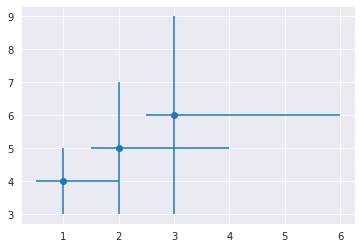

In [24]:

fig, ax = plt.subplots()
ax.errorbar([1,2,3], [4,5,6], 
                    xerr=[[0.5, 0.5, 0.5], [1,2,3]], 
                    yerr=[1,2,3], 
                    fmt='o')
plt.show()
